In [1]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 21kB/s 
     |████████████████████████████████| 512kB 42.3MB/s 
     |████████████████████████████████| 3.8MB 46.6MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=b93c20d793689ce6b1ea1cc05360e30f21317e64b58c3f20cb7e78d2de0dbca8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [2]:
!pip install keras==2.2.5

     |████████████████████████████████| 337kB 4.2MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [18]:
!pip install https://github.com/raghakot/keras-vis/archive/master.zip


  Using cached https://github.com/raghakot/keras-vis/archive/master.zip
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=30856 sha256=6eedb337a88ed36b9153b93cf79225ac4042c09c96468aa7b6167af867b3b5ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-b7zk11vv/wheels/7e/91/e5/9fdb0f2f5fa5d9f402c6fbfaf015aadbe3dba024ede6532727
Successfully built keras-vis


In [19]:
'''
  Visualizing how layers represent classes with keras-vis Saliency Maps.
'''

# =============================================
# Model to be visualized
# =============================================
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import activations

# Model configuration
img_width, img_height = 28, 28
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data based on channels first / channels last strategy.
# This is dependent on whether you use TF, Theano or CNTK as backend.
# Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = keras.utils.to_categorical(target_train, no_classes)
target_test = keras.utils.to_categorical(target_test, no_classes)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax', name='visualized_layer'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 44s 920us/step - loss: 0.3566 - acc: 0.8949 - val_loss: 0.1084 - val_acc: 0.9669
Epoch 2/25
48000/48000 [==============================] - 42s 879us/step - loss: 0.0965 - acc: 0.9695 - val_loss: 0.0586 - val_acc: 0.9833
Epoch 3/25
48000/48000 [==============================] - 42s 879us/step - loss: 0.0677 - acc: 0.9793 - val_loss: 0.0492 - val_acc: 0.9856
Epoch 4/25
48000/48000 [==============================] - 42s 878us/step - loss: 0.0551 - acc: 0.9828 - val_loss: 0.0435 - val_acc: 0.9873
Epoch 5/25
48000/48000 [==============================] - 42s 877us/step - loss: 0.0462 - acc: 0.9856 - val_loss: 0.0438 - val_acc: 0.9864
Epoch 6/25
48000/48000 [==============================] - 42s 876us/step - loss: 0.0391 - acc: 0.9871 - val_loss: 0.0360 - val_acc: 0.9897
Epoch 7/25
48000/48000 [==============================] - 42s 876us/step - loss: 0.0341 - acc: 0.9884 - val_loss: 0.

In [20]:
# =============================================
# Saliency Maps code
# =============================================
from vis.visualization import visualize_saliency
from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'visualized_layer')


In [22]:
# Swap softmax with linear
model.layers[layer_index].activation = activations.linear
model = utils.apply_modifications(model)

In [23]:
# Numbers to visualize
indices_to_visualize = [ 0, 12, 38, 83, 112, 74, 190 ]

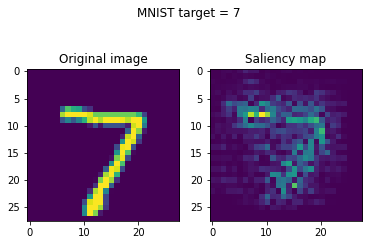

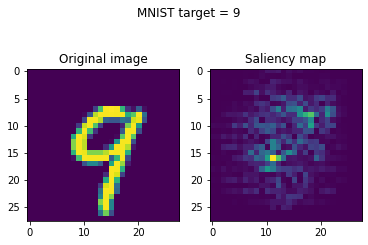

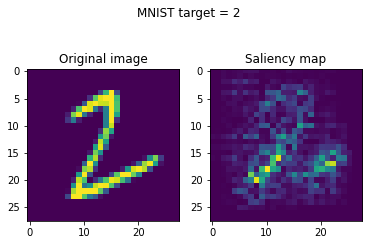

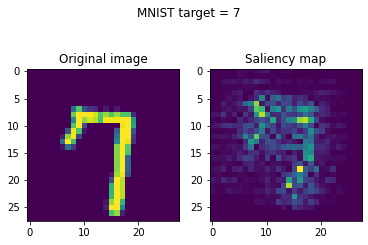

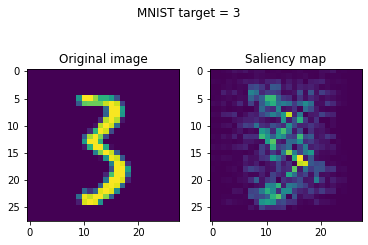

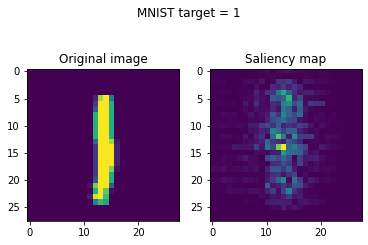

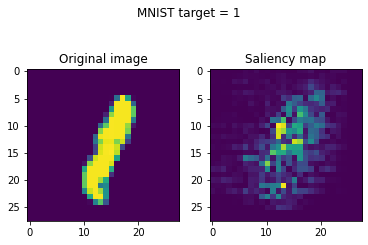

In [24]:
# Visualize
for index_to_visualize in indices_to_visualize:
  # Get input
  input_image = input_test[index_to_visualize]
  input_class = np.argmax(target_test[index_to_visualize])
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 2)
  # Generate visualization
  visualization = visualize_saliency(model, layer_index, filter_indices=input_class, seed_input=input_image)
  axes[0].imshow(input_image[..., 0]) 
  axes[0].set_title('Original image')
  axes[1].imshow(visualization)
  axes[1].set_title('Saliency map')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 55s 1ms/step - loss: 1.7213 - acc: 0.3774 - val_loss: 1.4359 - val_acc: 0.4921
Epoch 2/25
40000/40000 [==============================] - 53s 1ms/step - loss: 1.3661 - acc: 0.5127 - val_loss: 1.2978 - val_acc: 0.5517
Epoch 3/25
40000/40000 [==============================] - 53s 1ms/step - loss: 1.2297 - acc: 0.5673 - val_loss: 1.1762 - val_acc: 0.5937
Epoch 4/25
40000/40000 [==============================] - 53s 1ms/step - loss: 1.1419 - acc: 0.6009 - val_loss: 1.1022 - val_acc: 0.6236
Epoch 5/25
40000/40000 [==============================] - 53s 1ms/step - loss: 1.0704 - acc: 0.6254 - val_loss: 1.0315 - val_acc: 0.6494
Epoch 6/25
40000/40000 [==============================] - 53s 1ms/step - loss: 1.0146 - acc: 0.6463 - val_loss: 0.9873 - val_acc: 0.6655
Epoch 7/25
40000/40000 [==============================] - 53s 1ms/step - loss: 0.9667 - acc: 0.6622 - val_loss: 0.9679 - val_acc

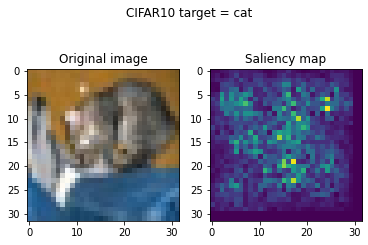

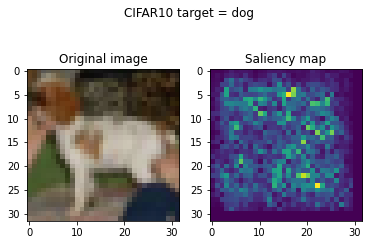

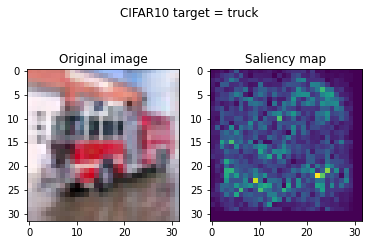

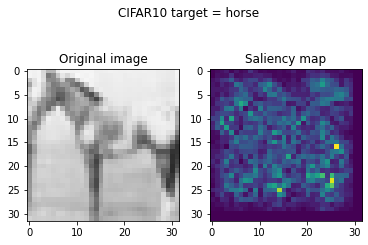

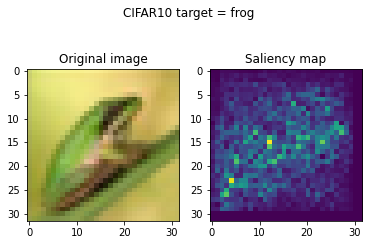

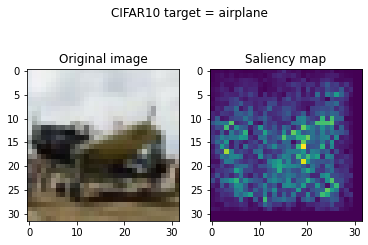

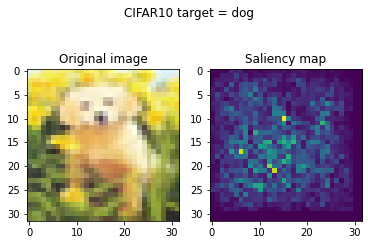

In [25]:
'''
  Visualizing how layers represent classes with keras-vis Saliency Maps.
'''

# =============================================
# Model to be visualized
# =============================================
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import activations

# Model configuration
img_width, img_height = 32, 32
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Reshape data based on channels first / channels last strategy.
# This is dependent on whether you use TF, Theano or CNTK as backend.
# Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 3, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 3, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 3)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 3)
    input_shape = (img_width, img_height, 3)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = keras.utils.to_categorical(target_train, no_classes)
target_test = keras.utils.to_categorical(target_test, no_classes)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax', name='visualized_layer'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# =============================================
# Saliency Maps code
# =============================================
from vis.visualization import visualize_saliency
from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np

# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'visualized_layer')

# Swap softmax with linear
model.layers[layer_index].activation = activations.linear
model = utils.apply_modifications(model)  

# Numbers to visualize
indices_to_visualize = [ 0, 12, 38, 83, 112, 74, 190 ]

# Visualize
for index_to_visualize in indices_to_visualize:
  # Get input
  input_image = input_test[index_to_visualize]
  # Class object
  classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
  }
  input_class = np.argmax(target_test[index_to_visualize])
  input_class_name = classes[input_class]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 2)
  # Generate visualization
  visualization = visualize_saliency(model, layer_index, filter_indices=input_class, seed_input=input_image)
  axes[0].imshow(input_image) 
  axes[0].set_title('Original image')
  axes[1].imshow(visualization)
  axes[1].set_title('Saliency map')
  fig.suptitle(f'CIFAR10 target = {input_class_name}')
  plt.show()